# **SW01: Signals and Sampling**

In this notebook, we will discover how to represent and manipulate a discrete-time signal in Python. Discrete-time data is widespread in signal processing and is often used to represent time-varying data, such as audio or sensor signals. In the life sciences, other examples of time series data include the recording of EEG (electroencephalography) or ECG (electrocardiography) signals, or gene expression measured at regular time intervals, ... and soooooo many things more!

Here, we want to understand how such data is represented. Concepts we will encounter are: **Superposition**, **sampling** and **interpolation**.

## **Exercises**
* [Exercise 1 – Combining signals](#exercise1)  
* [Exercise 2 – Signal sampling and sampling rate](#exercise2)  
* [Exercise 3 – Signal representation with Pandas](#exercise3)  
* [Exercise 4a – Downsampling and interpolation](#exercise4a)  
* [Exercise 4b - Resampling and interpolation](#exercise4b)  
* [Exercise 5 - Sampling theorem and aliasing](#exercise5)  

## **Preparations**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload

# Enable vectorized output (for nicer plots)
# Disable this line when converting notebook into PDF (via HTML)
# Enable this line when converting notebook into PDF (via LaTeX)
%config InlineBackend.figure_formats = ["svg"]
%matplotlib inline

import sys
sys.path.insert(0, "../")
import isp

---

<a id='exercise1'></a>

## **&#9734; Exercise 1 – Combining signals**

We can use mathematical functions to represent a signal. A useful property of mathematical functions like $f(x)=x^2$ and $g(x)=\sin(x)$ is the ability to combine these functions using mathematical operations:

$$
\begin{align*}
f(x) + g(x) &= x^2 + \sin(x) \\ 
f(x) \cdot g(x) &= x^2\sin(x)
\end{align*}
$$

Consider a scenario where you have two audio signals representing different musical instruments. By adding these signals, we can create a new composite signal representing the combination of both instruments playing simultaneously. 

In signal processing, we frequently add signals together. The entire Fourier theory (which we will explore later) relies on this concept, and the [superposition principle](https://en.wikipedia.org/wiki/Superposition_principle) – applicable to many physical systems – is fundamentally based on it. More on these topics later.

In other scenarios, it may be necessary to multiply two signals. For instance, this technique is used in amplitude modulation (a method for transmitting messages via radio waves) and to create various special effects in music synthesizers or effects devices.


### Instructions:
- Create two discrete-time signals, represented as a sequency samples $x_1[n]$ and $x_2[n]$
- Apply superposition to create a composite signal
- Visualize the original signals and the composite signal (using Matplotlib)


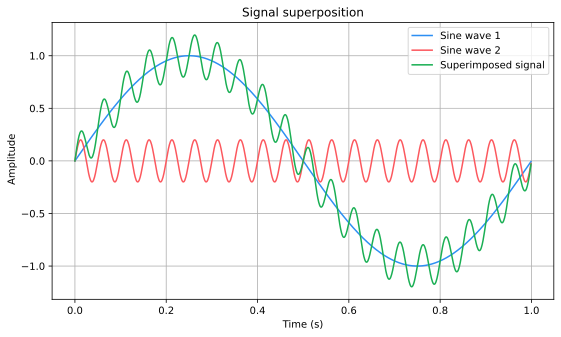

In [6]:
######################
###    EXERCISE    ###
######################

#Parameters
fs = 1000
t = np.arange(0,1,1/fs)
f1 = 1
f2 = 20

# 1. Create signals
#discrete signals = fixed difference between samples
x1 = np.sin(2 * np.pi * f1 * t)
x2 = 0.2 * np.sin(2* np.pi * f2 * t)

# 2. Create composite signal
#composite signal = sum of two signals
x = x1 + x2

# 3. Visualize signals
plt.figure(figsize =(9,5)) # Create a new figure
plt.plot(t, x1, label='Sine wave 1 ') 
plt.plot(t, x2, label='Sine wave 2')
plt.plot(t, x, label='Superimposed signal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(' Amplitude')
plt.title('Signal superposition')
plt.grid()
plt.show()

---

<a id='exercise2'></a>

## **&#9734; Exercise 2 – Signal sampling and sampling rate**

Signal sampling involves converting a continuous-time signal into a discrete-time signal. The sampling rate (also known as the sampling frequency) determines how many observations (samples) of the signal are taken per unit of time.

In the following, we assume that our continuous signal has the form $x(t) = A \sin(\omega t) = A\sin(2\pi f t)$, with frequency $f=5$ and amplitude $A=1$. We want to sample this signal with a sampling rate $f_s=100$ Hz.

In this exercise, we will illustrate the process of sampling. ...well, frankly, we are going to cheat a bit: To visualize the continuous-time signal, we will use a discrete-time representation, because that is what Matplotlib needs to plot the data. However, we will sample the continuous-time signal at a much higher rate so that it appears continuous in our visualization.


### Instructions
- Create samples that represent the "continuous-time" and discrete-time signals.  
Hint: Use [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) or [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) in combination with `np.sin()`. Can you identify the step at which the sampling takes place?
- Visualize the continuous-time signal
- Also visualize the discrete-time signal. Hint: Use [`plt.stem()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html).

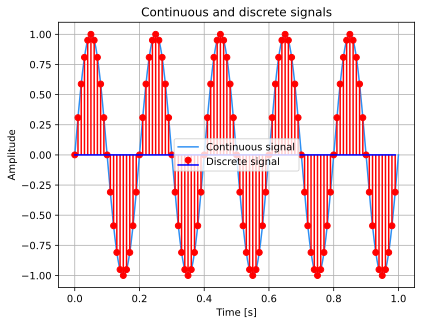

In [3]:
######################
###    EXERCISE    ###
######################

# Parameters for the continuous signal
frequency = 5   # Frequency of the continuous signal (in Hz)
amplitude = 1   # Amplitude of the continuous signal
duration = 1    # Signal duration in seconds

# Parameters for our discrete signal representations
fs = 100        # Sampling rate (in Hz)
fs_cont = 1000  # Sampling rate for continuous signal (in Hz)


# 1. Create continuous signal, np.linspace() for continuous signal
#starts at t at 0 seconds and ends at t at duration 1 second
t_cont = np.linspace(0, duration, fs_cont*duration)
x_cont = amplitude * np.sin(2*np.pi*frequency*t_cont)

# 2. Create discrete signal, np.arange() for discrete signal
t_disc = np.arange(0, duration, 1/fs)
x_disc = amplitude * np.sin(2*np.pi*frequency*t_disc)

# 3. Visualize signals
plt.figure() # Create a new figure
plt.plot(t_cont, x_cont, label='Continuous signal')
plt.stem(t_disc, x_disc, label='Discrete signal', linefmt='r-', markerfmt='ro', basefmt='b-')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Continuous and discrete signals')
plt.grid()
plt.show()


---

<a id='exercise3'></a>
## **&#9734;&#9734; Exercise 3 – Signal representation with Pandas**

In this exercise, we want to have a look how we can represent time series data using Pandas. As you have certainly gotten to know previously, Pandas is a powerful library for data manipulation and analysis. It is particularly useful for time series data. 

We will create a simple time series data set and visualize it using Pandas. Concretely, we will model the [circadian rhythm](https://en.wikipedia.org/wiki/Circadian_rhythm) as a sinusoidal function. The illustration on the left shows an idealized circadian sequence – it is the signal we want to model here. The figure on the right displays a typical alertness level of a human, which is linked to the circadian rhythm. (Image sources: [Link1](http://dx.doi.org/10.1134/S2079057018040069), [Link2](https://sleepspace.com/circadian-rhythm-2/). An article on how to measure alertness: [Link](https://doi.org/10.1196/annals.1417.011))

![Circadian rhythm](../data/doc/circadian-rhythm-collage.jpg)

### Tasks

- Create a time sequence suitable to simulate a circadian rhythm using [`pd.date_range()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)
- Create [time series object](https://pandas.pydata.org/docs/user_guide/timeseries.html) using the time sequence as an index
- Use different sampling frequencies to display the sine signal

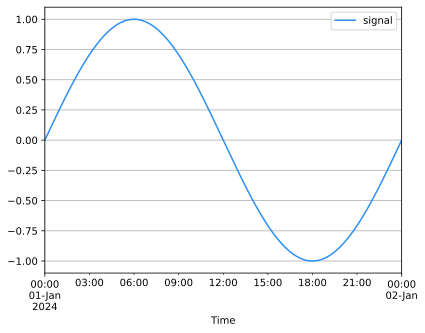

In [7]:
######################
###    EXERCISE    ###
######################

# Time parameters
start_date = "2024-01-01"
start_date = "2024-01-01 00:00:00"
end_date = "2024-01-02 00:00:00"
freq = "min"

# 1. Create time sequence
#pd.date_range() to generate a time sequence
time_index = pd.date_range(start = start_date, end = end_date, freq = freq)

# 2. Model the signal as sine wave
#1/24 = hour component, 1/(24*60) = minute component
#one circle is 360 degrees, 2pi is 360 degrees
#frequency = 1/24, 1/(24*60)
signal = np.sin(2*np.pi*1/24*time_index.hour + 2*np.pi*1/(24*60)*time_index.minute)

# 3. Create pd.Series or pd.DataFrame with the signal
#for x we use the signal, for index we use time_index
#columns is called signal
df_circadian = pd.DataFrame(signal, index = time_index, columns = ['signal'])

# 3. Visualize signal using pandas
df_circadian.plot()
plt.xlabel('Time')
plt.grid()
plt.xlim(start_date, end_date)
plt.show()

---

<a id='exercise4a'></a>
## **&#9734; Exercise 4a - Downsampling and interpolation**


Downsampling is a type of sampling, in which the sampling frequency of the available data is reduced. With interpolation, we can go the other way around: we can increase the sampling frequency of the available data. This is done by adding new data points between the existing ones. The new data points are calculated based on the existing ones. The process of adding new data points is called interpolation.

### Instructions
- Downsample the continuous signals (composite) from [Exercise 1](#exercise1). Use two methods
   - Method 1: Using numpy 
   - Method 2: Using pandas timeseries
- Visualize the original and downsampled signals
- Interpolate downsampled signals using various interpolation techniques. Make use of [`scipy.interpolate.interp1d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). Again use two methods
   - Method 1: Using the numpy array
   - Method 2: Using the pandas timeseries


x: (200,)
t: (200,)


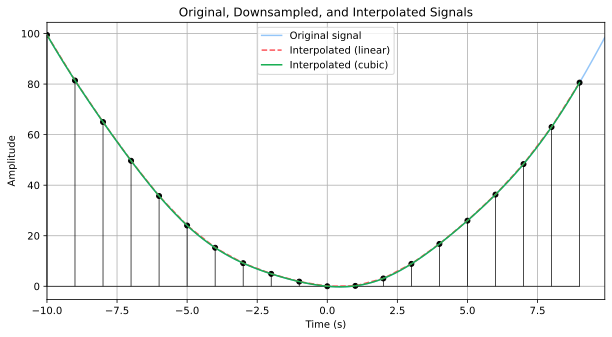

In [8]:

from scipy.interpolate import interp1d

#  originalsignal
n = np.arange(-10, 10, 0.1) 
t = n  
x = n**2 - np.sin(n)  # signal

print("x:", x.shape)
print("t:", t.shape)

#  Downsampling
downsampling_factor = 10
#array[start:stop:step]
x_downsampled = x[::downsampling_factor]
t_downsampled = t[::downsampling_factor]

#  Interpolation with linear and cubic method
t_interpolation = np.linspace(t_downsampled.min(), t_downsampled.max(), 500) 
interp_linear = interp1d(t_downsampled, x_downsampled, kind="linear")
interp_cubic = interp1d(t_downsampled, x_downsampled, kind="cubic")

x_interp_lin = interp_linear(t_interpolation)
x_interp_cubic = interp_cubic(t_interpolation)

# plotting
plt.figure(figsize=(10, 5))

# Original signal
plt.plot(t, x, linestyle="-", label="Original signal", alpha=0.5)

# Downsampled points with stemplot
ret = plt.stem(t_downsampled, x_downsampled, linefmt='k', markerfmt='ko', basefmt='k')
plt.setp(ret[0], markersize=5)   # set markersize
plt.setp(ret[1], linewidth=0.7)  # set line width
plt.setp(ret[2], linewidth=0.7)  # set baseline

# Interpolated signals
plt.plot(t_interpolation, x_interp_lin, label="Interpolated (linear)", linestyle="dashed")
plt.plot(t_interpolation, x_interp_cubic, label="Interpolated (cubic)", linestyle="solid")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original, Downsampled, and Interpolated Signals")
plt.legend()
plt.grid(True)

# scaling on the correct min and max
plt.xlim(t.min(), t.max())  

plt.show()


---

<a id='exercise4b'></a>
## **&#9734;&#9734; Exercise 4b – Resampling and interpolation**

We repeaet the exercise for our circadian rhythm data ([Exercise 3](#exercise3)). This time, however, we use the method [`pd.Series.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html). Note that the resulting resampler object can be used to group multiple data points within a sampling interval. Here, we want to use [`Resampler.asfreq()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.asfreq.html) to reindex a Series/DataFrame with the given frequency without grouping. Alternatively, we could compute the [`Resampler.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.mean.html) over the samples contained within a resampling period. 

For the interpolation, the resampler object also offers a method [`Resampler.interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.interpolate.html).

### Instructions
* Resample the circadian rhythm data using [`pd.Series.resample()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html)
* Reconstruct the original signal using [`pd.Resampler.interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.interpolate.html)
* Visualize the results

                       signal
2024-01-01 00:00:00  0.000000
2024-01-01 00:01:00  0.004363
2024-01-01 00:02:00  0.008727
2024-01-01 00:03:00  0.013090
2024-01-01 00:04:00  0.017452


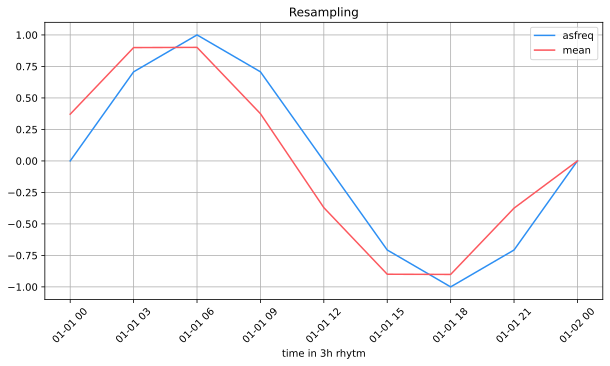

In [ ]:
######################
###    EXERCISE    ###
######################

# We use the data from exercise 3
print(df_circadian.head())

# 1. Resample the signal to every 3h hour
freq = "3h"
df_resampled_at_freq = df_circadian.resample(freq).asfreq()
df_resampled_mean = df_circadian.resample(freq).mean()

plt.figure(figsize=(10,5))
plt.plot(df_resampled_at_freq, label="asfreq")
plt.plot(df_resampled_mean, label="mean")

plt.grid()
#better readable
plt.xticks(rotation=45)  
plt.legend()
plt.title('Resampling')
plt.xlabel('time in 3h rhytm')
plt.show()


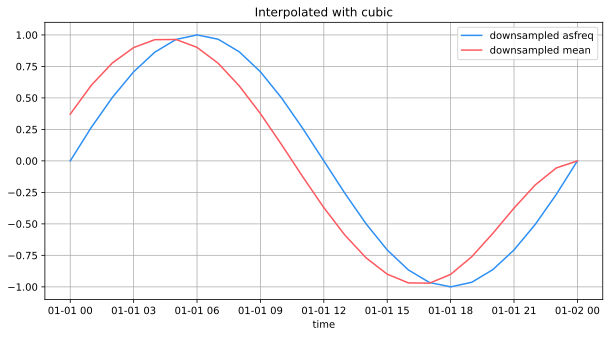

In [29]:


# 2. Apply interpolation
df_interp_mean = df_resampled_mean.resample('1h').interpolate(method = 'cubic')
df_interp_freq = df_resampled_at_freq.resample('1h').interpolate(method = 'cubic')
# 3. Visualize
plt.figure(figsize = (10,5))
plt.plot(df_interp_freq,label = 'downsampled asfreq')
plt.plot(df_interp_mean,label = 'downsampled mean')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.title('Interpolated with cubic')
plt.show()

---

<a id='exercise5'></a>
## **&#9734; Exercis 5 – Sampling theorem and aliasing**


Aliasing is a phenomenon that occurs when a continuous signal is sampled at a rate lower (or equal) than twice its highest frequency component. This causes the high-frequency components to appear as lower frequencies in the sampled signal, creating distortion and ambiguity. To avoid aliasing, the sampling rate should be at least twice the Nyquist frequency, which is the highest frequency of interest in the signal.

## Instructions
* Create a sinusoid signal with frequency of $f = 1$ kHz
* Resample the signal with sampling frequency $f_s$ smaller than the Nyquist threshold
* Visualize the aliasing effect (you may have to adjust the visible range along the x-axis (`plt.xlim()`))

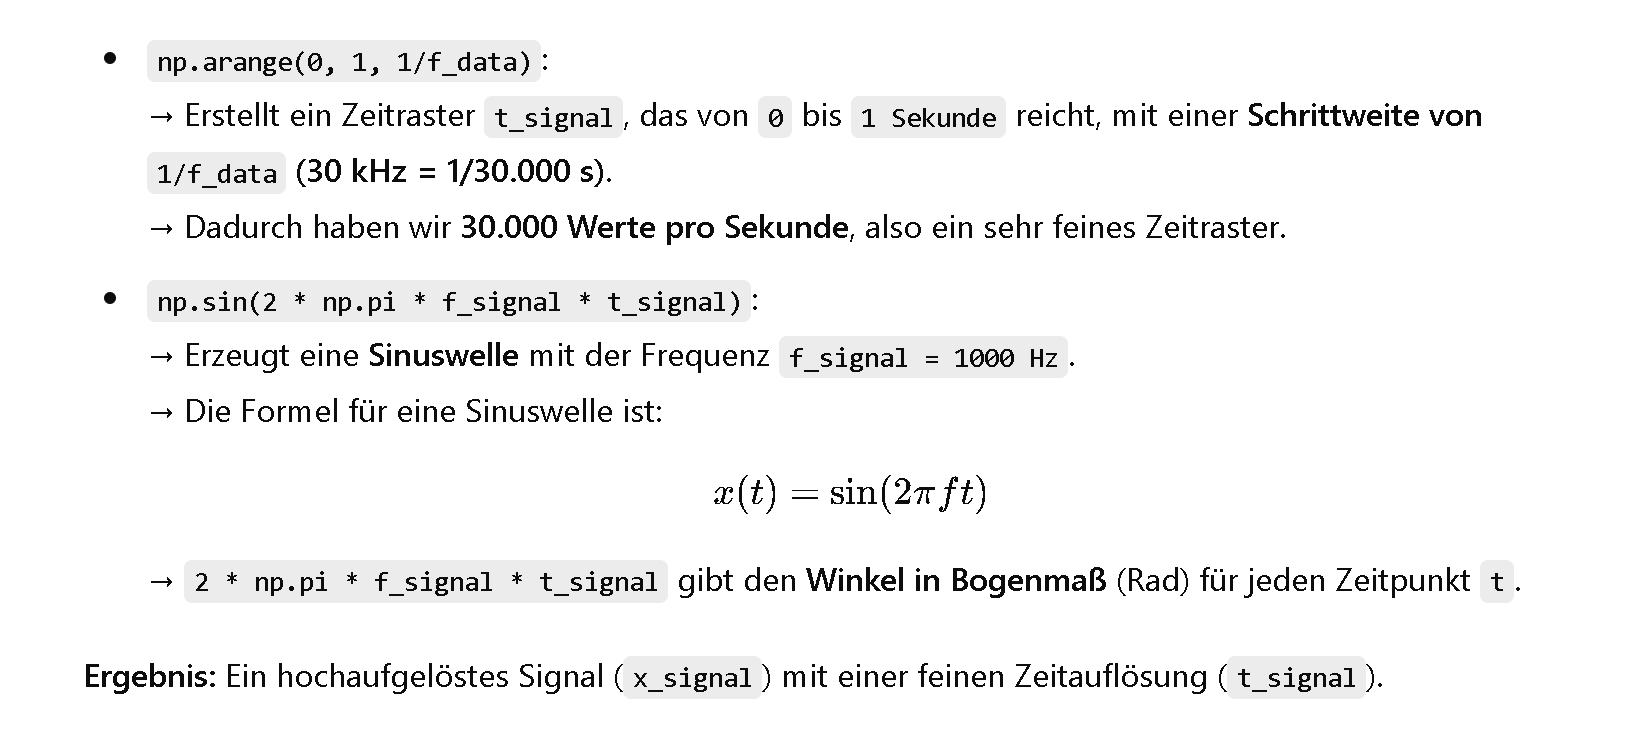

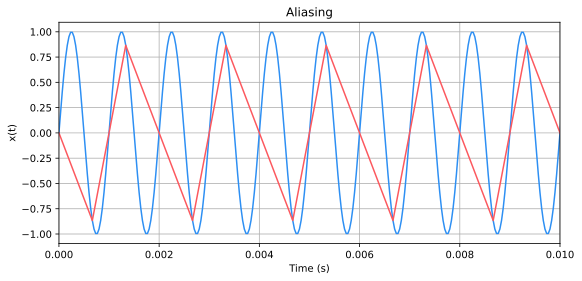

In [ ]:
######################
###    EXERCISE    ###
######################

# Define the sampling rates and the signal frequency
f_data = 30000  # in Hz
f_signal = 1000  # in Hz
f_sampling = 1500  # in Hz

# Construct the discrete-time signal
t_signal = np.arange(0, 1, 1/f_data)
x_signal = np.sin(2 * np.pi * f_signal * t_signal)

# Resample the signal with lower numbers
t_undersampled = np.arange(0, 1, 1/f_sampling)
x_undersampled = np.sin(2 * np.pi * f_signal * t_undersampled)

# Plot the original and undersampled signals
plt.figure(figsize=(9, 4))
plt.plot(t_signal, x_signal)
plt.title("Aliasing")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")

plt.plot(t_undersampled, x_undersampled)
plt.grid()
plt.xlim(0,0.01)
plt.show()